# Exam

In [1]:
import Pkg;
Pkg.add(path = "https://github.com/JuliaDynamics/RigorousInvariantMeasures.jl")
using RigorousInvariantMeasures

    Updating git-repo `https://github.com/JuliaDynamics/RigorousInvariantMeasures.jl`


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


We would like you to compute an approximation of the invariant density of
$$
D(x) = 4x+0.25 x(1-x) \quad \textrm{mod $1$}
$$
you can use the nonlinear example from Lecture 3 as a guide.

First of all, declare the dynamic $D$ through the use of the ```mod1_dynamic``` method.

In [2]:
D = 

Piecewise-defined dynamic with 4 branches

Now, declare a Ulam basis of 1024 elements through the use of ```Ulam```

In [3]:
B = 

Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 1025))

Compute the discretized operator $Q$ using ```DiscretizedOperator```

In [4]:
Q = 

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /Users/ysato/.julia/packages/RigorousInvariantMeasures/DkT8G/src/GenericAssembler.jl:102


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([1, 2, 3, 4, 5, 5, 6, 7, 8, 9  …  1017, 1017, 1018, 1019, 1020, 1021, 1021, 1022, 1023, 1024], [1, 1, 1, 1, 1, 2, 2, 2, 2, 2  …  1022, 1023, 1023, 1023, 1023, 1023, 1024, 1024, 1024, 1024], Interval{Float64}[[0.235297, 0.235298], [0.235303, 0.235304], [0.23531, 0.235311], [0.235316, 0.235317], [0.0587726, 0.0587727], [0.17655, 0.176551], [0.235329, 0.23533], [0.235335, 0.235336], [0.235341, 0.235342], [0.117443, 0.117444]  …  [0.133037, 0.133038], [0.13356, 0.133561], [0.266606, 0.266607], [0.266615, 0.266616], [0.266625, 0.266626], [0.0665926, 0.0665927], [0.200041, 0.200042], [0.266643, 0.266644], [0.266652, 0.266653], [0.266662, 0.266663]], 1024, 1024))

Now, compute upper bounds of the mixing rates using the function ```powernormbounds```

In [5]:
norms = 

32-element Vector{Float64}:
 1.0000000000106866
 1.0000000000213733
 1.0000000000320601
 1.000000000042747
 0.6755438143984902
 0.13365679559759627
 0.03476362980175331
 0.00859883549067364
 0.008598835490765533
 0.008598835490857427
 ⋮
 6.35797653656003e-7
 6.357976536627974e-7
 6.35797653669592e-7
 6.357976536763865e-7
 6.35797653683181e-7
 3.4355434206538184e-7
 8.49786770361317e-8
 2.210263426052065e-8
 5.467119429144266e-9

Compute the invariant vector of $Q$ by using ```invariant_vector```

In [6]:
w = 

1024-element Vector{Float64}:
 0.9794232376293208
 0.9794579436101664
 0.9794969677732827
 0.979534042045067
 0.979578459328797
 0.9796184845441617
 0.9796548234292805
 0.9796913260093828
 0.9797383090940989
 0.9797800245674603
 ⋮
 1.0209352126961182
 1.0209844864439928
 1.0210253615883218
 1.0210703059754
 1.0211061101607941
 1.0211546949380625
 1.0211931916998056
 1.0212353070762163
 1.021272063397528

Compute now the rigorous L1 error bound using ```distance_from_invariant```

In [7]:
error = 

0.0005580945869495989

We plot the invariant density and the error.

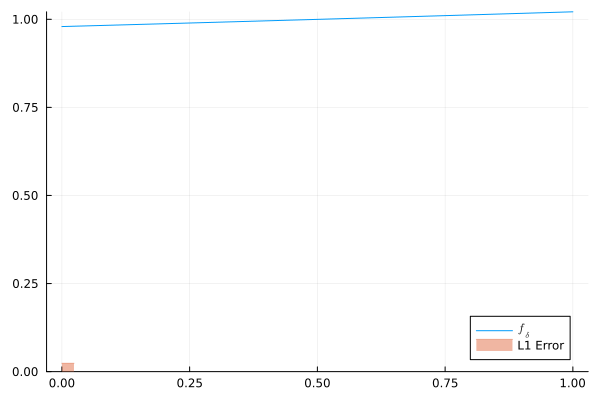

In [8]:
using Plots
plot(B, w)
plot!(B, error)

We will use the coarse-fine method to get better bounds for the error. Define a basis Ulam basis B_fine with $2^{16}$ elements, and the associated discretized operator Q_fine.

In [9]:
B_fine = 
Q_fine = 

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /Users/ysato/.julia/packages/RigorousInvariantMeasures/DkT8G/src/GenericAssembler.jl:102


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([1, 2, 3, 4, 5, 5, 6, 7, 8, 9  …  65529, 65529, 65530, 65531, 65532, 65533, 65533, 65534, 65535, 65536], [1, 1, 1, 1, 1, 2, 2, 2, 2, 2  …  65534, 65535, 65535, 65535, 65535, 65535, 65536, 65536, 65536, 65536], Interval{Float64}[[0.235294, 0.235295], [0.235294, 0.235295], [0.235294, 0.235295], [0.235294, 0.235295], [0.0588227, 0.0588228], [0.176471, 0.176472], [0.235294, 0.235295], [0.235294, 0.235295], [0.235294, 0.235295], [0.117643, 0.117644]  …  [0.133328, 0.133329], [0.133336, 0.133337], [0.266665, 0.266666], [0.266665, 0.266666], [0.266666, 0.266667], [0.0666655, 0.0666656], [0.2, 0.200001], [0.266666, 0.266667], [0.266666, 0.266667], [0.266666, 0.266667]], 65536, 65536))

Compute the fine norms using ```finepowernormbounds```, the invariant vector and the error

In [10]:
normQ_fine = opnormbound(B_fine, weak_norm(B_fine), Q_fine)
norms_fine = 
w_fine = invariant_vector(B_fine, Q_fine)
error_fine = distance_from_invariant(B_fine, D, Q_fine, w_fine, norms_fine)

2.2288111484175973e-5

We plot the invariant density and the error

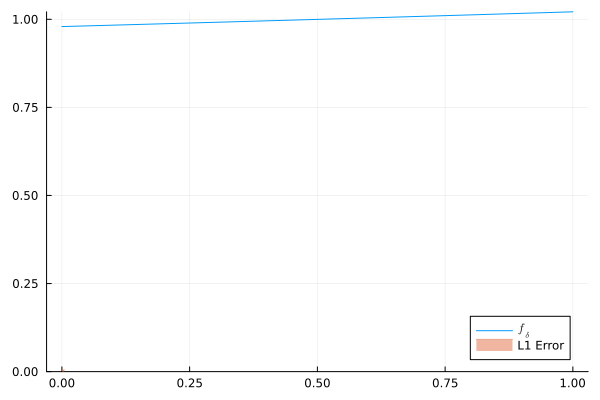

In [11]:
plot(B_fine, w_fine)
plot!(B_fine, error_fine)

Discretize the projection of the logarithm of the derivative on the Ulam basis using ```discretizationlogder```

In [12]:
logder =

Observable(Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 65537)), Interval{Float64}[[1.44691, 1.44692], [1.44691, 1.44692], [1.44691, 1.44692], [1.44691, 1.44692], [1.44691, 1.44692], [1.4469, 1.44691], [1.4469, 1.44691], [1.4469, 1.44691], [1.4469, 1.44691], [1.4469, 1.44691]  …  [1.32177, 1.32178], [1.32177, 1.32178], [1.32177, 1.32178], [1.32176, 1.32177], [1.32176, 1.32177], [1.32176, 1.32177], [1.32176, 1.32177], [1.32176, 1.32177], [1.32175, 1.32176], [1.32175, 1.32176]], [1.32175, 1.44692])

Now compute the Lyapunov exponent of the dynamics using `integrateobservable`

[1.38517, 1.38524]